## Mission 1. Netflix and Code

호주니는 요즘 넷플릭스를 보는데 심취해있다. 최근 넷플릭스와 협업하는 K-Contents가 늘어가는 것을 보면서 자부심을 느끼는 한편, 넷플릭스에 얼마나 많은 한국 작품이 있는지 궁금해졌다. 호주니를 도와 넷플릭스에 얼마나 많은 한국 작품이 있는지 알아보자.

### Mandatory Part

넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오:

한국 작품은 총 얼마나 있는가?
country column을 기준으로 한다.
"South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [23]:
import pandas as pd
netflix = pd.read_csv('./netflix_titles.csv')
country_content = netflix['show_id'].groupby(by = netflix['country'])
country_content.count()['South Korea']

183

#### 183개

### Bonus Part

생각보다 많은 작품이 있었음에 놀란 호주니는 K-콘텐츠를 넘어 글로벌 콘텐츠에 관심을 가지게 되었다. 이 과정에서 가장 많은 콘텐츠가 있는 국가는 어디일지 궁금해졌다. 호주니를 도와 이번에는 넷플릭스에서 가장 많은 작품을 만든 나라가 어디이고, 얼마나 많은 작품을 produce했는지 알아보자.

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
    - country column을 기준으로 한다.
    - **단일 국가**인 경우를 기준으로 결과를 구해보자.

In [33]:
netflix_content_count = country_content.count()
single_country_content = [key for key in netflix_content_count.keys() if ',' not in key]
netflix_single_country_content = netflix_content_count.loc[single_country_content]
max_content_country = netflix_single_country_content[netflix_single_country_content == max(netflix_single_country_content)]
max_content_country

country
United States    2555
Name: show_id, dtype: int64

#### 미국 : 2555개

## Mission 2. 가즈아!

서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 **Moving Average(이동평균법)** 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

### Mandatory Part

다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격** 그래프를 그려주세요

- 선의 색깔은 **노란색(#f2a900)**으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

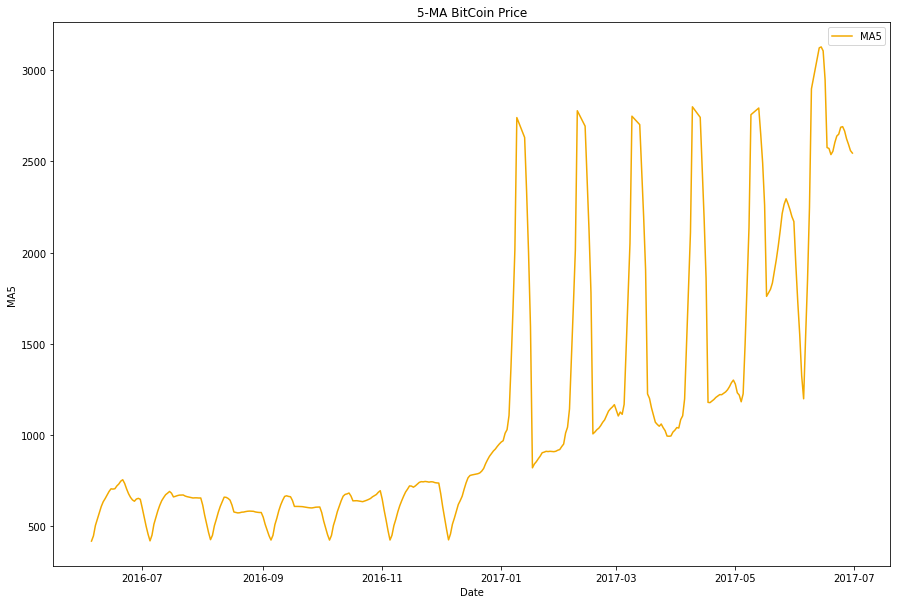

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

bitcoin = pd.read_csv('./Bitcoin.csv', index_col = 'Date', parse_dates=True, usecols=['Date', 'Open']).sort_values(by='Date')
bitcoin = bitcoin.loc['2016-06-01':'2017-06-30']
bitcoin_ma5 = bitcoin['Open'].rolling(5).mean()

plt.figure(figsize=(15, 10))
plt.title('5-MA BitCoin Price')

plt.xlabel("Date")
plt.ylabel("MA5")
plt.plot(bitcoin_ma5, label='MA5', color = '#f2a900')

plt.legend()
plt.show()

해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

### Bonus Part

위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프**를 동시에 그려주세요.

- 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

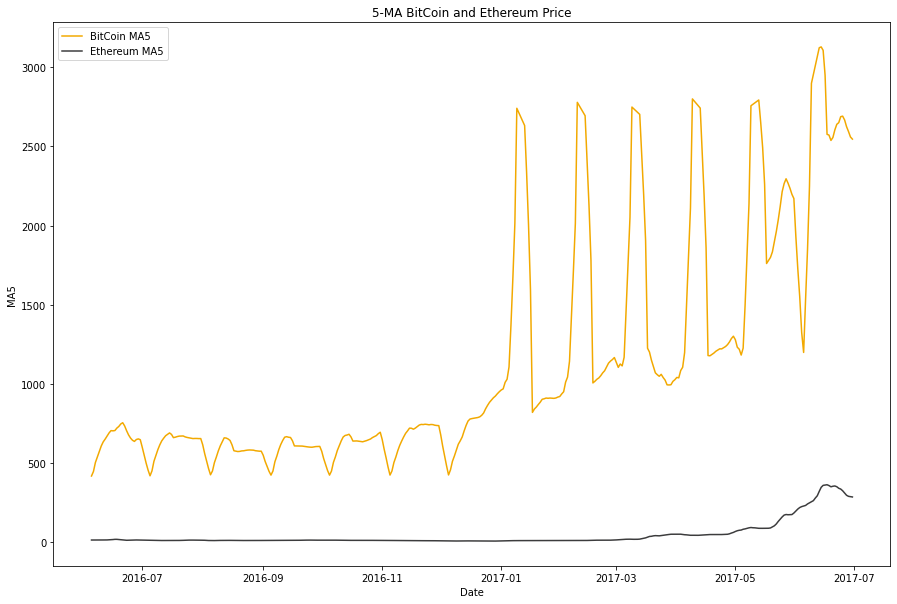

In [59]:
ethereum = pd.read_csv('./ETH_day.csv', index_col = 'Date', parse_dates=True, usecols=['Date', 'Open']).sort_values(by='Date')
ethereum = ethereum.loc['2016-06-01':'2017-06-30']
ethereum_ma5 = ethereum['Open'].rolling(5).mean()

plt.figure(figsize=(15, 10))
plt.title("5-MA BitCoin and Ethereum Price")
plt.xlabel('Date')
plt.ylabel('MA5')

plt.plot(bitcoin_ma5, label='BitCoin MA5', color='#f2a900')
plt.plot(ethereum_ma5, label='Ethereum MA5', color='#3c3c3d')

plt.legend()
plt.show()